#Blatt 03 Aufgabe 2

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

##Aufg 2.1
Laden von Bildern

In [26]:
frame1=imread('./kombibilder/bild1.png')
frame2=imread('./kombibilder/bild2.png')
frame3=imread('./kombibilder/bild3.png')
frame4=imread('./kombibilder/bild4.png')

frameStack=np.dstack([frame1,frame2,frame3,frame4])
#Bilder zu einem 3D-Array stapeln, dritte Dimension gibt dann die Anzahl der Bilder (hier 4)



Mittelwert berechnen um Rauschen zu vermindern

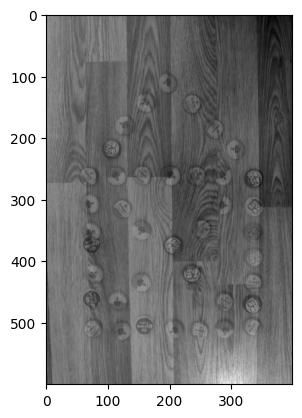

In [27]:
backgroundMean=np.mean(frameStack, axis=2).astype(np.uint8)
#Mittelwert über dritte Dimension berechnen, also über die 4 Grauwerte an einer Koordinate 
plt.figure(1)#dieser Code ist optional
plt.imshow(backgroundMean,cmap="gray")

##Aufg 2.2
Verbesserung vom Background durch Median Berechnung

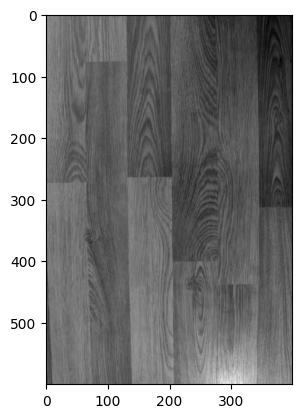

In [28]:
background=np.median(frameStack,axis=2).astype(np.uint8)

plt.figure(2)
plt.imshow(background,cmap="gray")

##Aufg2.3
Erzeuge neues Hintergrundbild oder Kopie,umd die veränderten Pixel in jedem der 4 Einzelbilder zu ermitteln.

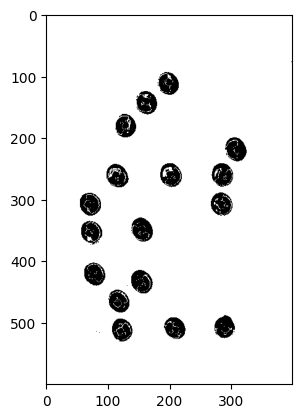

In [29]:
bgOrg=np.copy(background)

plt.figure(3)
plt.imshow(np.isclose(background, frame1,atol=10),cmap='gray')#Optionale Visualisierung der gefundenen Veränderung (hier Background und Frame1) 

##Aufg 2.4
Ersetzt nacheinander für jedes der 4 Bilder die veränderten Pixel im Hintergrund durch die entsprechenden Pixel des Einzelbildes.

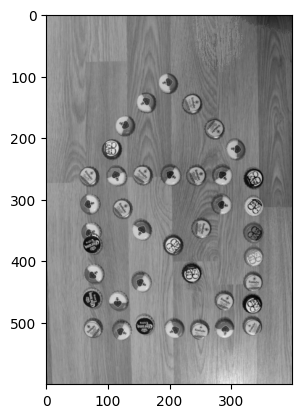

In [30]:
#Bild1
diff=1-np.isclose(bgOrg,frame1,atol=15)
#diff=np.abs(bgOrg-frame1)>15
xs,ys=np.nonzero(diff)

background[xs,ys]=frame1[xs,ys]

#Bild2
xs,ys=np.nonzero(1-np.isclose(bgOrg,frame2,atol=15))
background[xs,ys]=frame2[xs,ys]

#Bild3
xs,ys=np.nonzero(1-np.isclose(bgOrg,frame3,atol=15))
background[xs,ys]=frame3[xs,ys]

#Bild4
xs,ys=np.nonzero(1-np.isclose(bgOrg,frame4,atol=15))
background[xs,ys]=frame4[xs,ys]




plt.figure(4)
plt.imshow(background,cmap='gray')

Antwort:
Das Haus von Nikolaus